## Звіт до практичної роботи №3

### Виконала: студентка групи  22-ICT

#### Гупалік Анастасія

Практичні завдання (Python):
1. Реалізуйте функцію `bubble_sort(array_to_sort)`, яка сортує список `array_to_sort` за допомогою алгоритму сортування бульбашкою.
2. Реалізуйте функцію `selection_sort(array_to_sort)`, яка сортує список `array_to_sort` за допомогою алгоритму сортування вибором.
3. Напишіть програму, яка зчитує список чисел з клавіатури та сортує його за допомогою обох алгоритмів. Виведіть відсортований список та кількість операцій порівняння та обміну, виконаних кожним алгоритмом.
4. Порівняйте ефективність алгоритмів сортування бульбашкою та сортування вибором на списках різної довжини (наприклад, 10, 1k, 100k, 1kk  елементів). Виміряйте час або кількість операцій виконання кожного алгоритму та `*`побудуйте графік залежності часу(кількості операцій) виконання від розміру списку за допомогою Python.
5. `*`Реалізуйте модифікацію алгоритму сортування бульбашкою, яка зупиняється, якщо під час проходу по списку не було зроблено жодного обміну.
6. Висновок


In [12]:
def bubble_sort(array_to_sort):

    n = len(array_to_sort)
    for i in range(n-1):
        for j in range(n-i-1):
            if array_to_sort[j] > array_to_sort[j+1]:
                array_to_sort[j], array_to_sort[j+1] = array_to_sort[j+1], array_to_sort[j]

    return array_to_sort

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = bubble_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [21]:
def selection_sort(array_to_sort):

    n = len(array_to_sort)
    for i in range(n):
      min_index = i
      for j in range(i+1, n):
         if array_to_sort[j] < array_to_sort[min_index]:
           min_index = j
      array_to_sort[i], array_to_sort[min_index] = array_to_sort[min_index], array_to_sort[i]

    return array_to_sort

mylist = [64, 34, 25, 12, 22, 11, 90, 5]

sorted_list = selection_sort(mylist)
print(sorted_list)

[5, 11, 12, 22, 25, 34, 64, 90]


In [25]:
def bubble_sort(array_to_sort):
    array_to_sort = array_to_sort.copy()  # Створюємо копію
    n = len(array_to_sort)
    comparisons = 0
    swaps = 0

    for i in range(n-1):
        for j in range(n-i-1):
            comparisons += 1 # Лічильник порівнянь
            if array_to_sort[j] > array_to_sort[j+1]:
                array_to_sort[j], array_to_sort[j+1] = array_to_sort[j+1], array_to_sort[j]
                swaps += 1 # Лічильник обмінів

    return array_to_sort, comparisons, swaps


def selection_sort(array_to_sort):
    array_to_sort = array_to_sort.copy()  # Створюємо копію
    n = len(array_to_sort)
    comparisons = 0
    swaps = 0

    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            comparisons += 1  # Лічильник порівнянь
            if array_to_sort[j] < array_to_sort[min_index]:
                min_index = j

        # Обмін тільки якщо знайдено менший елемент
        if min_index != i:
            array_to_sort[i], array_to_sort[min_index] = array_to_sort[min_index], array_to_sort[i]
            swaps += 1  # Лічильник обмінів

    return array_to_sort, comparisons, swaps

mylist_input = input("Введіть числа через пробіл: ")
mylist = [int(x) for x in mylist_input.split()]

print(f"Вихідний: {mylist}")
sorted_list_1, comp_1, swap_1 = selection_sort(mylist)
print(f"Selection Sort: {sorted_list_1}, порівнянь: {comp_1}, обмінів: {swap_1}")

sorted_list_2, comp_2, swap_2 = bubble_sort(mylist)
print(f"Bubble Sort: {sorted_list_2}, порівнянь: {comp_2}, обмінів: {swap_2}")

Вихідний: [10, 654, 10, 6, 0, 58, 1, 5, 8, 10, 365, 1, 63]
Selection Sort: [0, 1, 1, 5, 6, 8, 10, 10, 10, 58, 63, 365, 654], порівнянь: 78, обмінів: 12
Bubble Sort: [0, 1, 1, 5, 6, 8, 10, 10, 10, 58, 63, 365, 654], порівнянь: 78, обмінів: 37


Графік


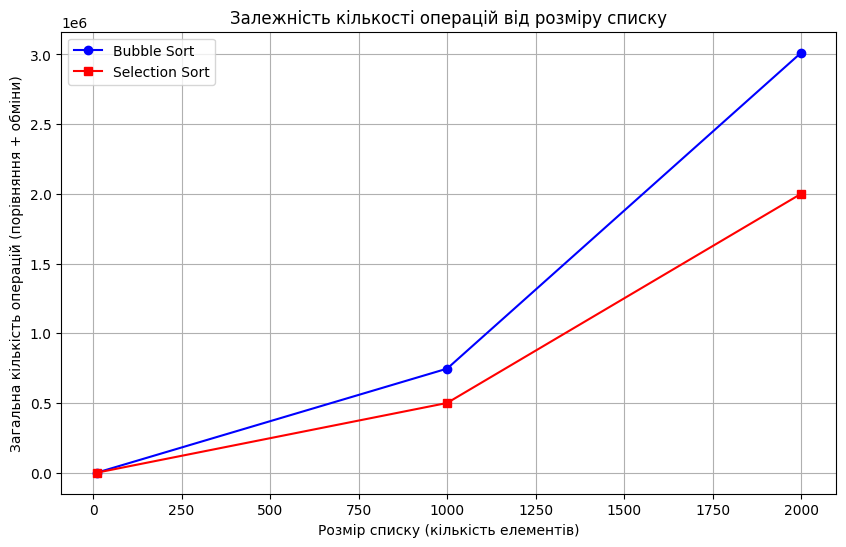

In [34]:
import random
import matplotlib.pyplot as plt

def bubble_sort_counted(arr):
    n = len(arr)
    ops = 0
    for i in range(n-1):
        for j in range(n-i-1):
            ops += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                ops += 1
    return ops

def selection_sort_counted(arr):
    n = len(arr)
    ops = 0
    for i in range(n-1):
        min_idx = i
        for j in range(i+1, n):
            ops += 1
            if arr[j] < arr[min_idx]:
                min_idx = j
        if min_idx != i:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
            ops += 1
    return ops

sizes = [10, 1000, 2000]
bubble_ops_list = []
selection_ops_list = []

for size in sizes:
    data = [random.randint(0, 10000) for _ in range(size)]

    # Рахуємо операції для Bubble Sort
    b_ops = bubble_sort_counted(data.copy())
    bubble_ops_list.append(b_ops)

    # Рахуємо операції для Selection Sort
    s_ops = selection_sort_counted(data.copy())
    selection_ops_list.append(s_ops)

plt.figure(figsize=(10, 6)) # Розмір вікна з графіком
plt.plot(sizes, bubble_ops_list, label='Bubble Sort', marker='o', color='blue')
plt.plot(sizes, selection_ops_list, label='Selection Sort', marker='s', color='red')

plt.title('Залежність кількості операцій від розміру списку')
plt.xlabel('Розмір списку (кількість елементів)')
plt.ylabel('Загальна кількість операцій (порівняння + обміни)')
plt.legend()
plt.grid(True)

plt.show()

In [35]:
def optimized_bubble_sort(array_to_sort):
    n = len(array_to_sort)

    for i in range(n - 1):
        swapped = False
        for j in range(n - 1 - i):
            if array_to_sort[j] > array_to_sort[j + 1]:
                array_to_sort[j], array_to_sort[j + 1] = array_to_sort[j + 1], array_to_sort[j]
                swapped = True
        if not swapped:
            break

    return array_to_sort

## Висновок

Ми детально розглянули два класичні алгоритми сортування: сортування бульбашкою(Bubble Sort) та сортування вибором (Selection Sort). Ось ключові підсумки:

* Bubble Sort: Працює шляхом постійного обміну сусідніх елементів. Він простий у реалізації, але зазвичай найповільніший через величезну кількість операцій запису в пам'ять (обмінів). Його можна оптимізувати, додавши перевірку на те, чи був список вже відсортований під час проходу.

* Selection Sort: Працює шляхом пошуку мінімального елемента та його переміщення на правильну позицію. Він зазвичай швидший за Bubble Sort на практиці, оскільки робить мінімальну кількість обмінів (максимум $N$ обмінів для списку довжиною $N$).

Ці алгоритми є фундаментом для розуміння принципів сортування та аналізу ефективності програмного коду.